In [13]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [27]:
df.columns = [c.replace(' ','') for c in df.columns]
df.head()

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [31]:
df.loc[df['ChanceofAdmit'] < 0.8, 'ChanceofAdmit'] = 0
df.loc[df['ChanceofAdmit'] >= 0.8, 'ChanceofAdmit'] = 1
df.head()

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [35]:
x = df.drop(['ChanceofAdmit','SerialNo.'],axis=1)
y = df['ChanceofAdmit']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [43]:
clf = DecisionTreeClassifier()

In [45]:
clf = clf.fit(X_train, y_train)

In [47]:
y_pred = clf.predict(X_test)

In [49]:
print("Confusion Matrix: \n")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix: 

[[66  5]
 [ 4 25]]


In [51]:
print("1: Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("2: Precision Score:", metrics.precision_score(y_test, y_pred))
print("3: Recall Score:", metrics.recall_score(y_test, y_pred))
print("4: F1 Score:", metrics.f1_score(y_test, y_pred))

1: Accuracy Score: 0.91
2: Precision Score: 0.8333333333333334
3: Recall Score: 0.8620689655172413
4: F1 Score: 0.847457627118644


In [53]:
from sklearn import tree

In [55]:
import matplotlib.pyplot as plt

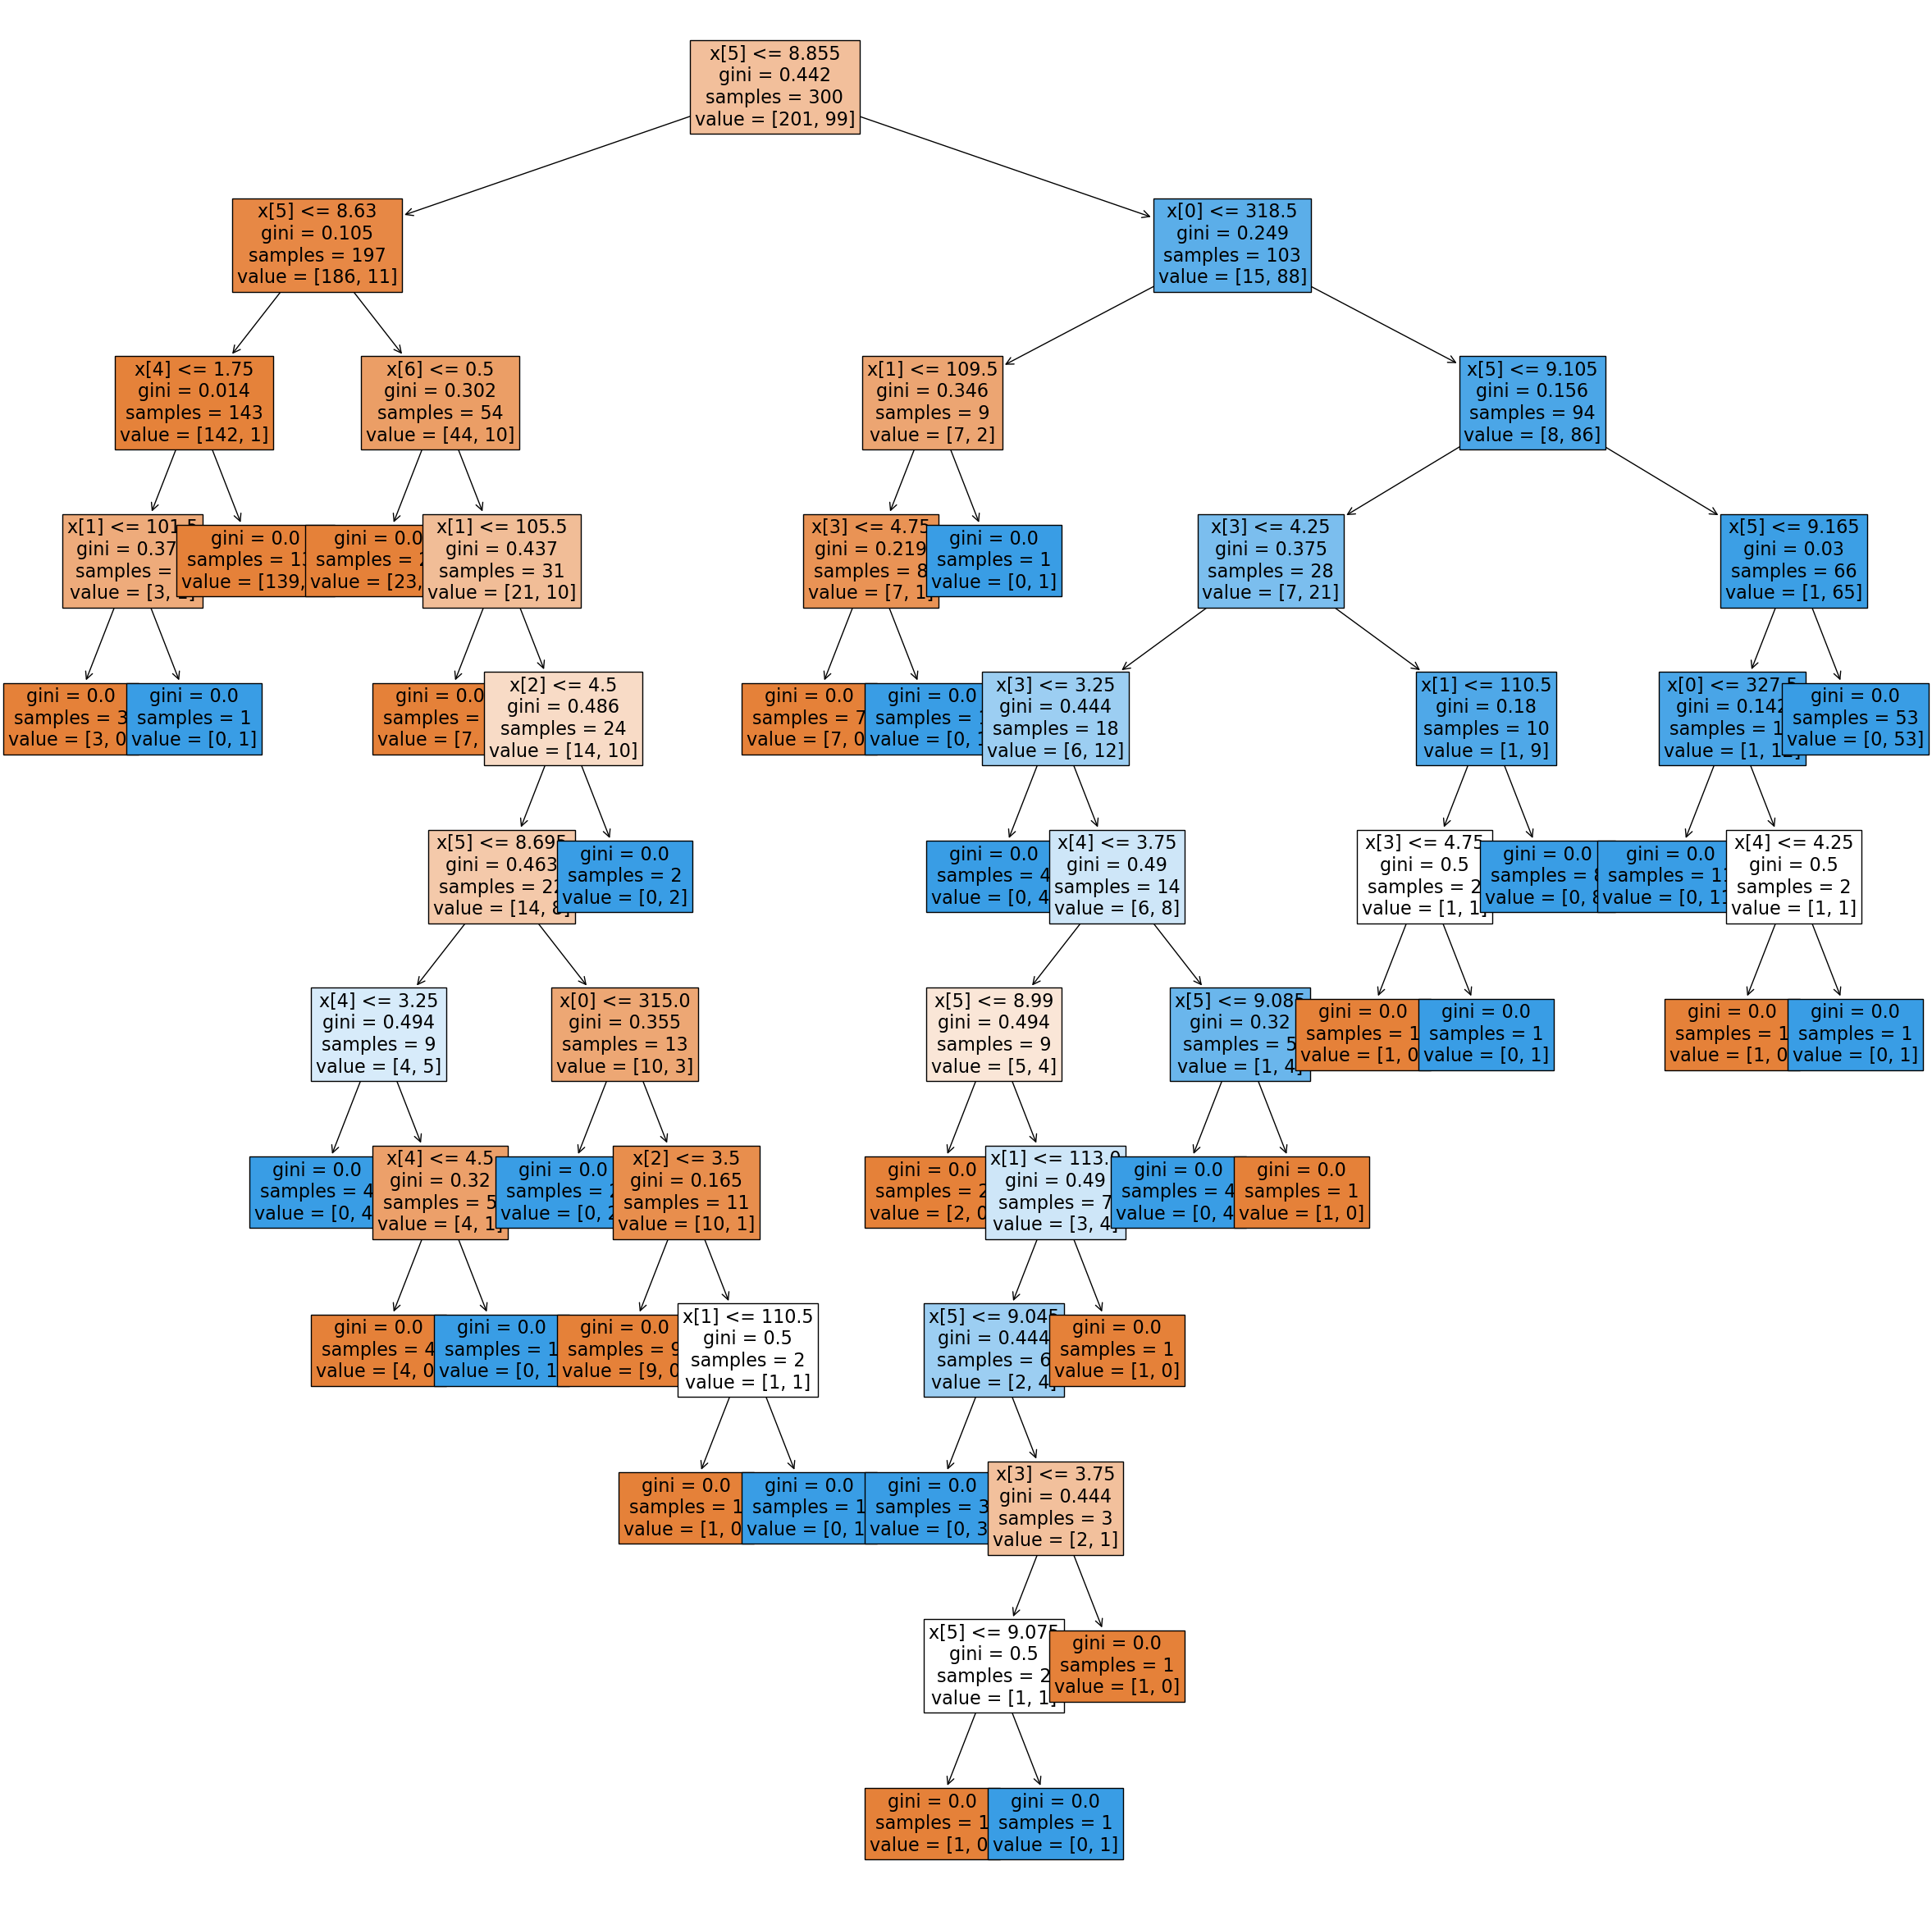

In [57]:
plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled=True, fontsize=16)
plt.show()